In [1]:
import pandas as pd
import random
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘 Basic 풍력 발전량 예측 AI 경진대회/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘 Basic 풍력 발전량 예측 AI 경진대회/test.csv')

In [4]:
train.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


In [5]:
train.tail()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
19270,TRAIN_19270,12.020000,1023.8,81.4,1.6,176.0,0.00,False,0.0,7.047
19271,TRAIN_19271,17.232000,993.2,78.2,2.0,198.0,0.06,False,26.4,3.670
19272,TRAIN_19272,13.748000,999.8,65.0,6.4,260.0,0.36,False,53.0,3.328
19273,TRAIN_19273,19.354000,1019.4,45.4,2.4,120.0,0.06,False,20.0,12.379
19274,TRAIN_19274,13.731863,1004.2,81.6,2.0,222.2,0.06,False,44.2,6.374


In [6]:
# X는 독립변수이므로 종속변수를 제거합니다. 또한 target 이외의 분석에 활용하지 않는 데이터(id)를 제거
train_x = train.drop(columns=['id', 'target'])
# y는 종속변수로 값을 설정
train_y = train['target']

In [7]:
# train에서와 마찬가지로 분석에 활용하지 않는 데이터(id)를 제거
test_x = test.drop(columns=['id'])

### DATA PRE-PROCESSING


*   결측치 없음



In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [9]:
le = LabelEncoder()
le = le.fit(train_x['snowing'])
train_x['snowing'] = le.transform(train_x['snowing'])

for label in np.unique(test_x['snowing']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)
    test_x['snowing'] = le.transform(test_x['snowing'])
print('Done.')

Done.


In [10]:
train_x['snowing'].value_counts()

0    19150
1      125
Name: snowing, dtype: int64

In [11]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     19275 non-null  float64
 1   pressure        19275 non-null  float64
 2   humidity        19275 non-null  float64
 3   wind_speed      19275 non-null  float64
 4   wind_direction  19275 non-null  float64
 5   precipitation   19275 non-null  float64
 6   snowing         19275 non-null  int64  
 7   cloudiness      19275 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [12]:
train_x.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.288476,1059.825712,68.948763,2.476970,166.578179,0.076572,0.006485,25.749748
std,7.192604,2544.132430,14.856929,1.359942,57.313099,0.193110,0.080271,17.628612
min,-0.208137,812.600000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.712000,1012.600000,57.800000,1.400000,127.000000,0.000000,0.000000,12.000000
50%,16.530000,1016.800000,70.800000,2.200000,166.600000,0.000000,0.000000,23.000000
75%,22.559000,1021.000000,80.800000,3.200000,208.000000,0.060000,0.000000,37.000000
max,37.058000,201373.000000,100.000000,29.800000,338.000000,3.180000,1.000000,93.600000




*   Visualization


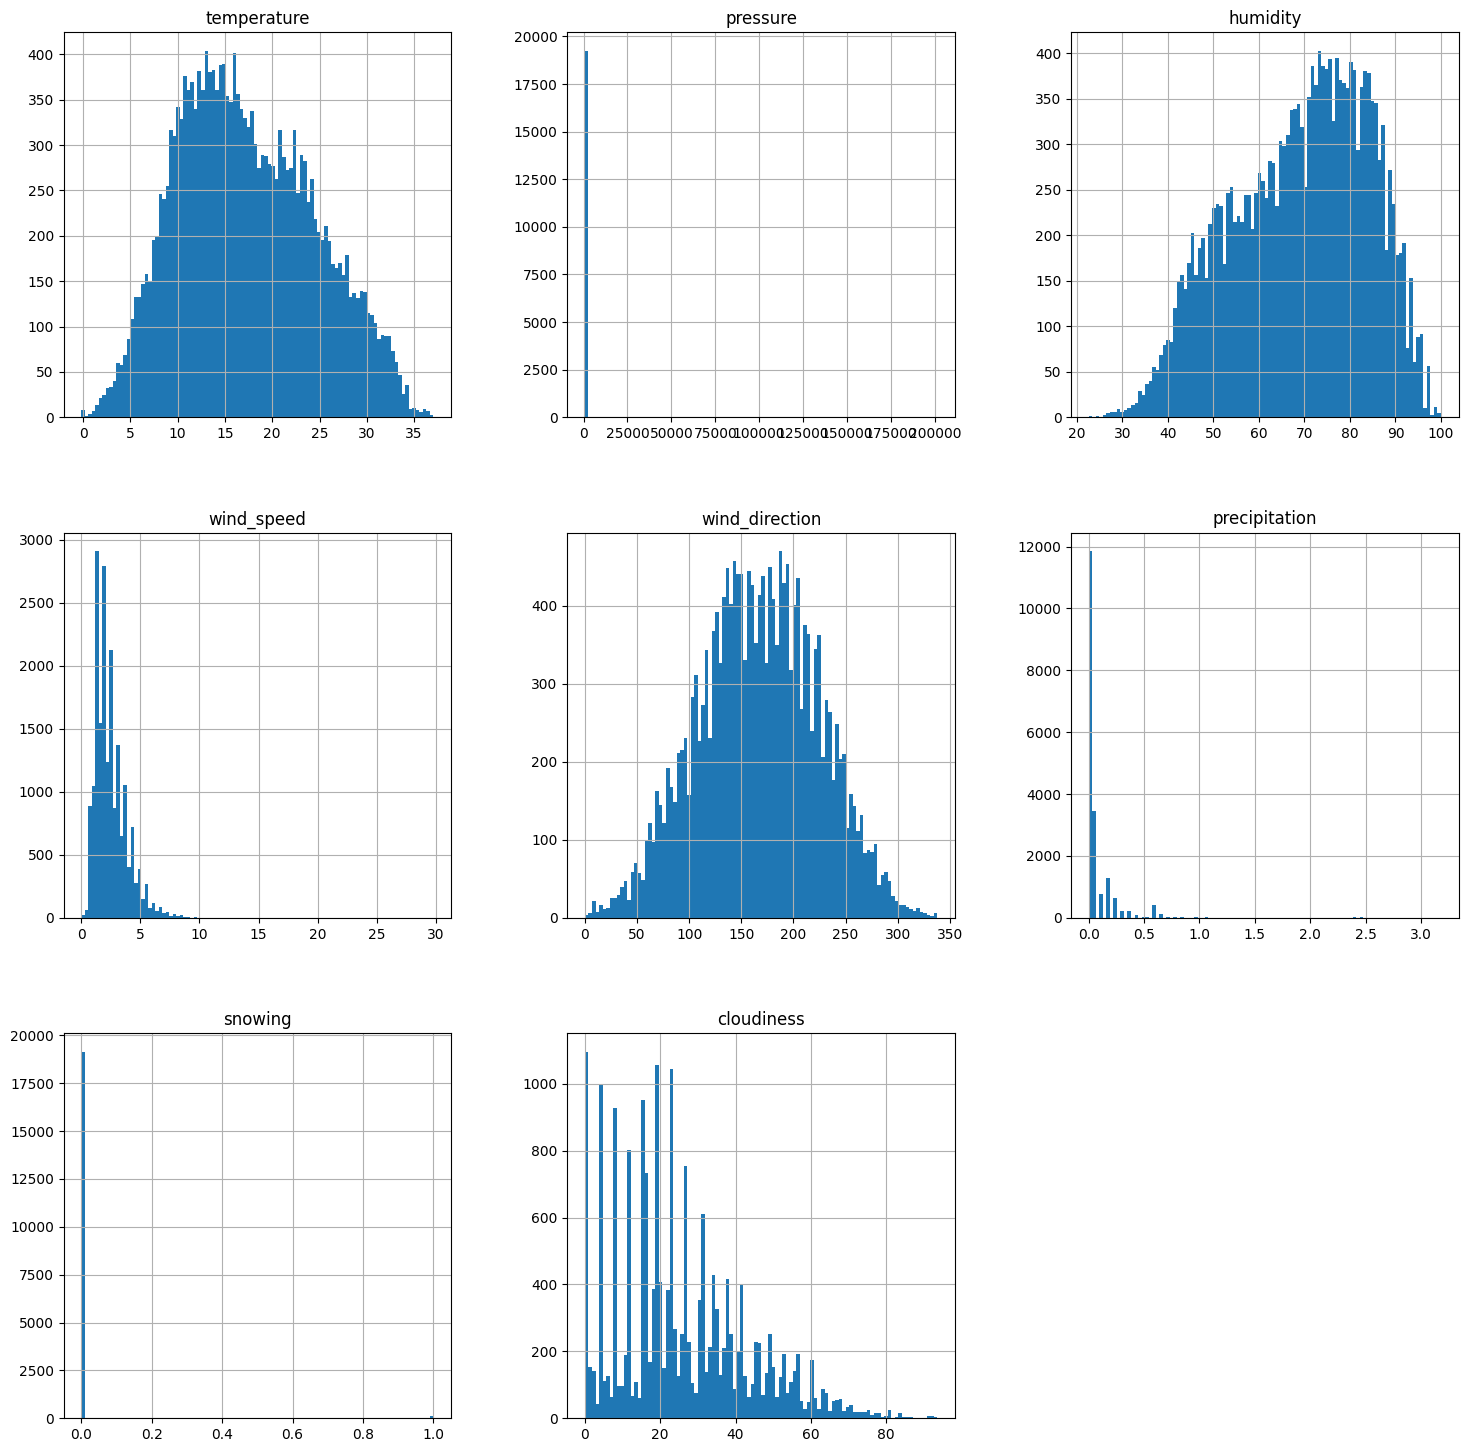

In [13]:
train_x.hist(bins=100, figsize=(18,18))
plt.show()

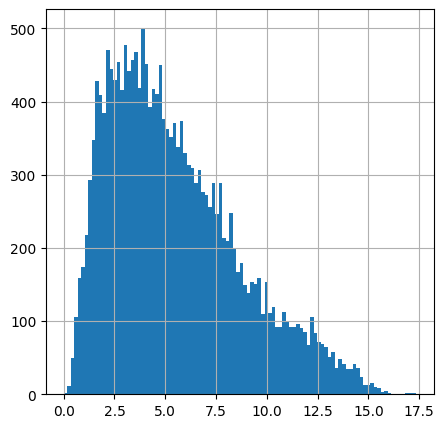

In [14]:
train_y.hist(bins=100, figsize=(5,5))
plt.show()

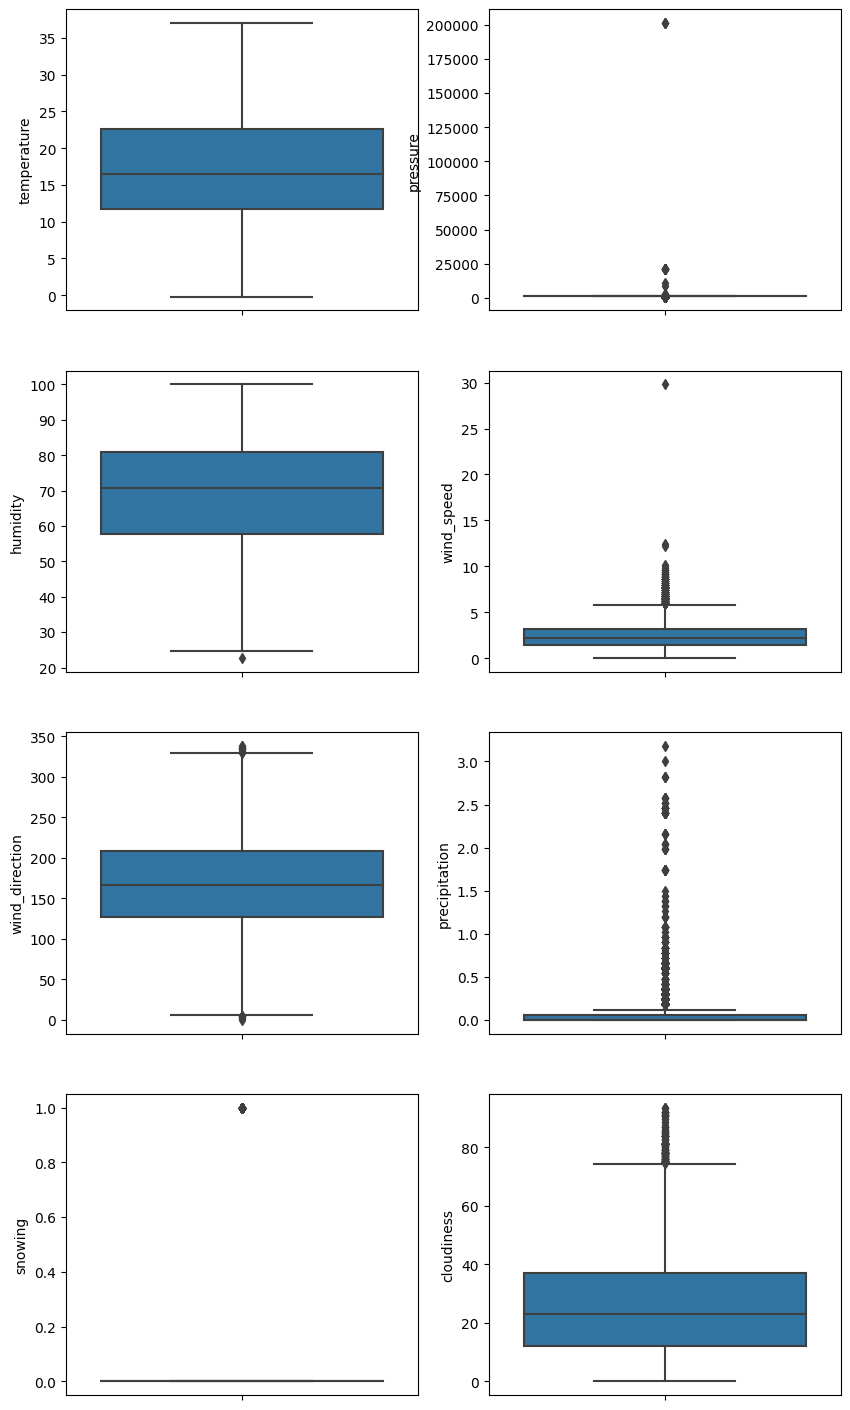

In [15]:
#이상치 확인
fig, axes = plt.subplots(4,2, figsize=(10,18))

sns.boxplot(y = train_x['temperature'], ax=axes[0][0])
sns.boxplot(y = train_x['pressure'], ax=axes[0][1])

sns.boxplot(y = train_x['humidity'], ax=axes[1][0])
sns.boxplot(y = train_x['wind_speed'], ax=axes[1][1])

sns.boxplot(y = train_x['wind_direction'], ax=axes[2][0])
sns.boxplot(y = train_x['precipitation'], ax=axes[2][1])

sns.boxplot(y = train_x['snowing'], ax=axes[3][0])
sns.boxplot(y = train_x['cloudiness'], ax=axes[3][1])


plt.show()

In [16]:
train_y

0         1.180
1         8.581
2         3.978
3         8.301
4         1.692
          ...  
19270     7.047
19271     3.670
19272     3.328
19273    12.379
19274     6.374
Name: target, Length: 19275, dtype: float64

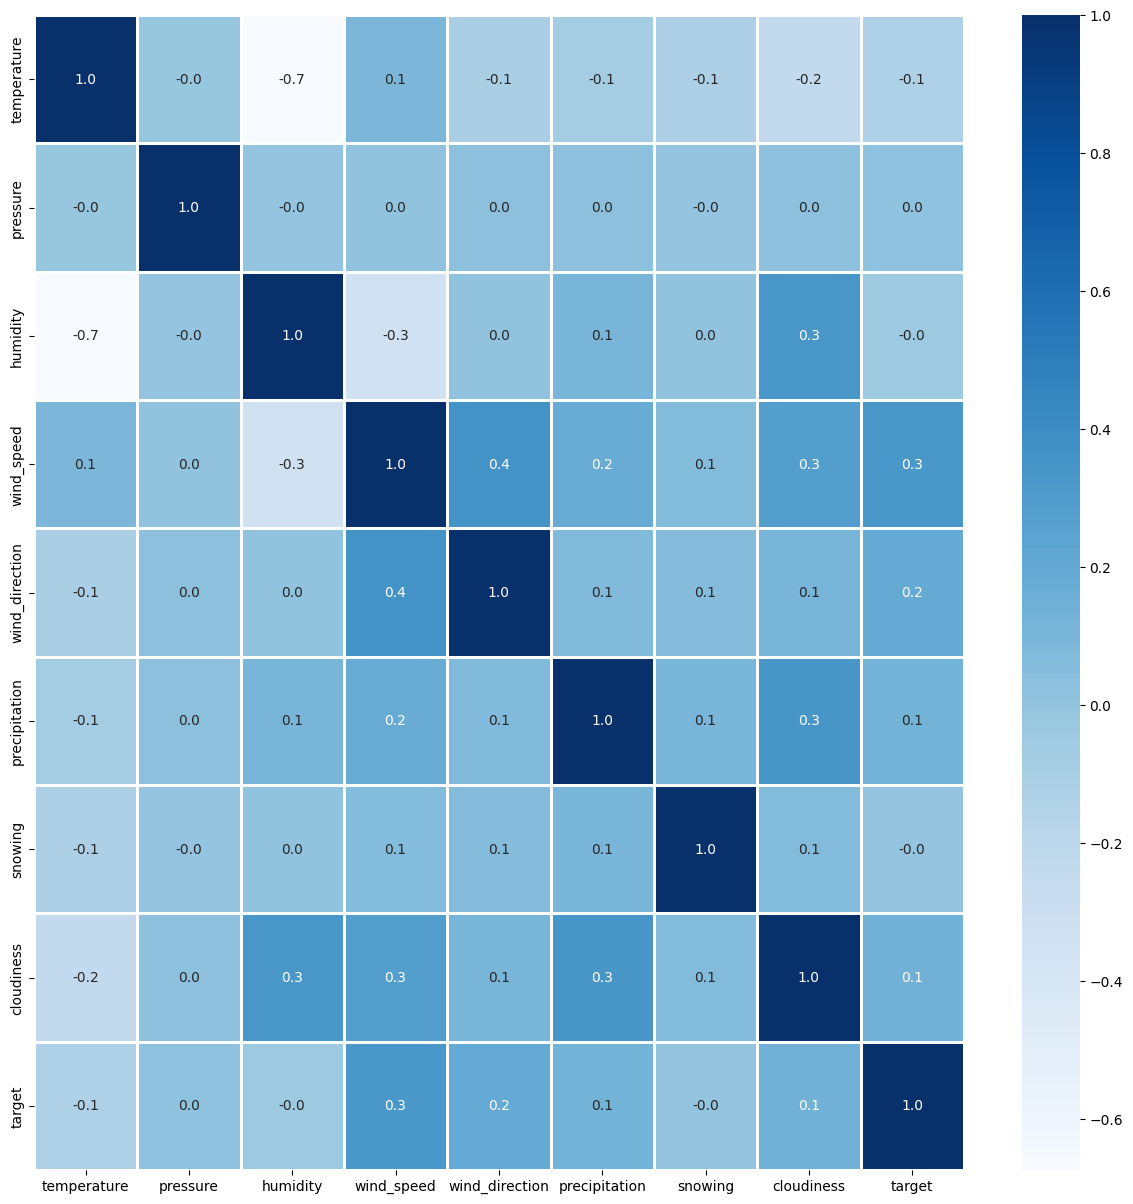

In [17]:
#상관관계 히트맵
plt.figure(figsize = (15,15))
sns.heatmap(train.drop(columns=['id'], axis=1).corr(), annot = True, fmt = '.1f', linewidth = 1, cmap = 'Blues')

plt.show()

In [18]:
features = ['wind_speed', 'wind_direction', 'pressure']
train_x = train[features]
train_y = train['target']
test_x = test[features]

In [19]:
train_y.head()

0    1.180
1    8.581
2    3.978
3    8.301
4    1.692
Name: target, dtype: float64

In [20]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(19275, 3)
(19275,)
(19275, 3)


In [21]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [22]:
# Feature Selection using SelectPercentile
select2 = SelectPercentile(score_func=f_classif, percentile=30)
select2.fit(train_x, train_y)

SelectPercentile(percentile=30)

In [23]:
# Transform the training and testing data based on selected features
X_train_select2 = select2.transform(train_x)
X_test_select2 = select2.transform(test_x)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Train Random Forest model with the original features
model100 = RandomForestRegressor(n_estimators=100, random_state=10)
model100.fit(train_x, train_y)

RandomForestRegressor(random_state=10)

In [26]:
# Train Random Forest model with selected features
model = RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(X_train_select2, train_y)

RandomForestRegressor(random_state=10)

### REGRESSION Model Definition


*   분석에 사용할 모델을 선언



In [27]:
# Train Linear Regression model with selected features
LR = LinearRegression()
LR.fit(X_train_select2, train_y)

LinearRegression()

### Model Fit

In [28]:
# Make predictions
preds1 = model100.predict(test_x)         # Random Forest with original features
preds2 = model.predict(X_test_select2)    # Random Forest with selected features
preds3 = LR.predict(X_test_select2)       # Linear Regression with selected features


###Prediction

In [29]:
# Print the results
print('Random Forest with original features:', preds1)
print('Random Forest with selected features:', preds2)
print('Linear Regression with selected features:', preds3)
print('Done.')

Random Forest with original features: [5.32421    6.46039    6.91307667 ... 5.50035    4.34054    3.78057   ]
Random Forest with selected features: [5.0953088  5.49391696 5.67508832 ... 5.35417009 4.22666545 4.24603691]
Linear Regression with selected features: [5.10426001 5.41687332 5.57317997 ... 5.26056666 4.16642007 4.32272673]
Done.


###Submit

In [ ]:
# 제출 파일을 불러옵니다.
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘 Basic 풍력 발전량 예측 AI 경진대회/sample_submission.csv')

In [ ]:
submit['target'] = preds
submit.head()

,id,target
0,TEST_00000,4.320523
1,TEST_00001,5.660996
2,TEST_00002,5.010099
3,TEST_00003,4.208054
4,TEST_00004,5.365134


In [ ]:
submit['target'] = preds1
submit.head()

In [ ]:
submit['target'] = preds2
submit.head()

In [ ]:
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘 Basic 풍력 발전량 예측 AI 경진대회/LR.csv', index=False)
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘 Basic 풍력 발전량 예측 AI 경진대회/model100.csv', index=False)
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘 Basic 풍력 발전량 예측 AI 경진대회/model.csv', index=False)